## 割线法

In [1]:
import numpy as np

In [42]:
def secant_method(f, x0, x1, tol=1e-10, num_iter=1000):
    x = []
    x.append(x0)
    x.append(x1)
    difference = 1
    for k in range(1, num_iter):
        if (f(x[k]) - f(x[k-1])) == 0:
            print("Reconsider the initial points!")
            return None, None
        x.append(x[k] - (f(x[k])*(x[k]-x[k-1])) / (f(x[k])-f(x[k-1]))) # 迭代公式
        if abs(f(x[k+1])) < tol:
            print("the number of iteration: ", k)
            break
            
    return x[-1], x[1:]

## 1. 找到$x^4-2x^2-4=0$的根

In [24]:
import matplotlib.pyplot as plt

In [25]:
f = lambda x: x**4 - 2 * x**2 - 4

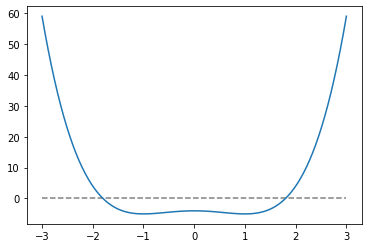

In [26]:
xn = np.linspace(-3, 3, 100)
plt.plot(xn, f(xn))
plt.hlines(0, -3, 3, linestyles='--', alpha=0.5)
plt.show()

In [27]:
root1, root1_lst = secant_method(f, x0=2, x1=3)
root1

the number of iteration:  7


1.798907439947957

In [28]:
root2, root2_lst = secant_method(f, x0=-2, x1=-3)
root2

the number of iteration:  7


-1.798907439947957

### 迭代过程

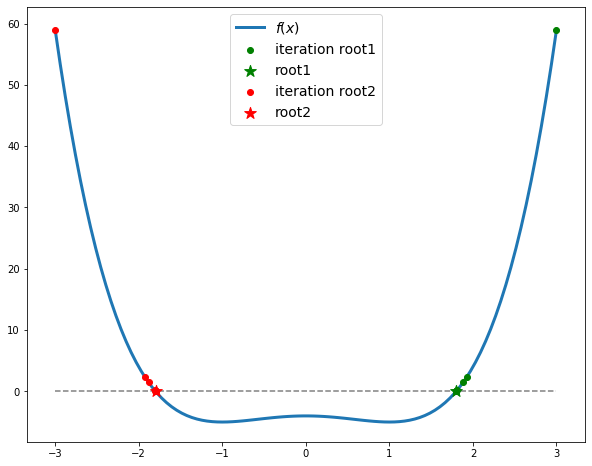

In [8]:
plt.figure(figsize=(10, 8))
plt.plot(xn, f(xn), linewidth=3, label="$f(x)$")
plt.scatter(root1_lst, f(np.array(root1_lst)), c='g',zorder=3, label="iteration root1")
plt.scatter(root1, f(root1), c='g', marker='*', zorder=5, s=150, label="root1")
plt.scatter(root2_lst, f(np.array(root2_lst)), c='r', zorder=3, label="iteration root2")
plt.scatter(root2, f(root2), c='r', marker='*', zorder=3, s=150, label="root2")
plt.hlines(0, -3, 3, linestyles='--', alpha=0.5)
plt.legend(fontsize=14)
plt.show()

### 对比牛顿法

In [9]:
# 定义一阶微分
def df(f):
    def dd(x, epsilon=1e-10):
        return (f(x+epsilon) - f(x)) / epsilon
    return dd

def newton_method(f, x0, tol=1e-10, num_iter=1000):
    x = []
    x.append(x0)
    for k in range(num_iter):
        x.append(x[k] - f(x[k]) / df(f)(x[k])) # 迭代公式
        if abs(f(x[k+1])) < tol:
            print("the number of iteration: ", k+1)
            break
        
    return x[-1], x

In [10]:
newton_root1, newton_root1_lst = newton_method(f, 3)
newton_root1

the number of iteration:  6


1.7989074399527596

In [11]:
newton_root2, newton_root2_lst = newton_method(f, -3)
newton_root2

the number of iteration:  6


-1.7989074399516738

In [12]:
(root1_lst, newton_root1_lst)

([3,
  1.9272727272727272,
  1.882420676047185,
  1.809062616243903,
  1.7997707656255781,
  1.7989168603939956,
  1.7989074487461367,
  1.798907439947957],
 [3,
  2.3854162626342093,
  2.005591921076262,
  1.8350584539172698,
  1.8002566737298409,
  1.7989094065195763,
  1.7989074399527596])

In [13]:
(root2_lst, newton_root2_lst)

([-3,
  -1.9272727272727272,
  -1.882420676047185,
  -1.809062616243903,
  -1.7997707656255781,
  -1.7989168603939956,
  -1.7989074487461367,
  -1.798907439947957],
 [-3,
  -2.3854171724001483,
  -2.005592222603996,
  -1.835058204046303,
  -1.8002566381551914,
  -1.7989094072611016,
  -1.7989074399516738])

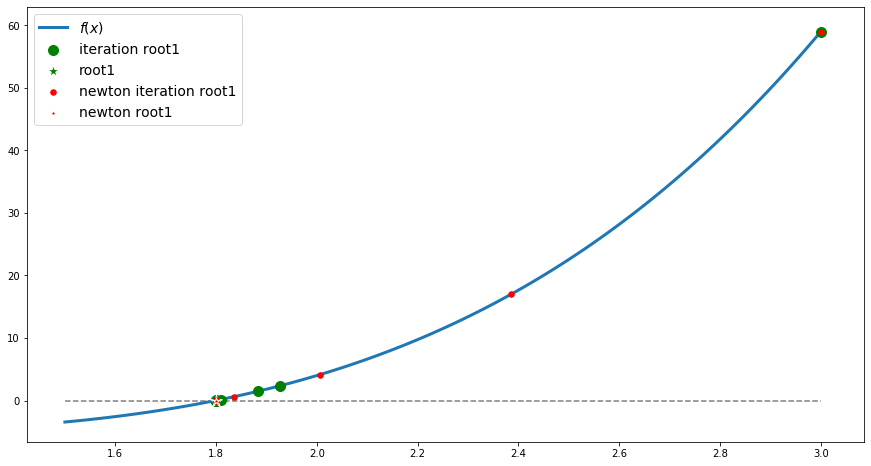

In [14]:
xn = np.linspace(1.5, 3, 100)

plt.figure(figsize=(15, 8))
plt.plot(xn, f(xn), linewidth=3, label="$f(x)$")
plt.scatter(root1_lst, f(np.array(root1_lst)), c='g',zorder=3, s=100, label="iteration root1")
plt.scatter(root1, f(root1), c='g', marker='*', edgecolors="white", zorder=3, s=150, label="root1")

plt.scatter(newton_root1_lst, f(np.array(newton_root1_lst)), c='r',
            zorder=5, s=30, label="newton iteration root1")
plt.scatter(newton_root1, f(newton_root1), c='r', marker='*', edgecolors="white",
            zorder=5, s=50, label="newton root1")
plt.hlines(0, 1.5, 3, linestyles='--', alpha=0.5)
plt.legend(fontsize=14)
plt.show()

### 使用 `Scipy`

In [15]:
import scipy.optimize as optimize

optimize.newton(f, 3, fprime=None)

1.7989074399478673

In [17]:
optimize.newton(f, -3, fprime=None)

-1.7989074399478673

## 2. 找到$x^5-3x^4+25=0$的根

In [30]:
g = lambda x: x**5 - 3 * x**4 + 25

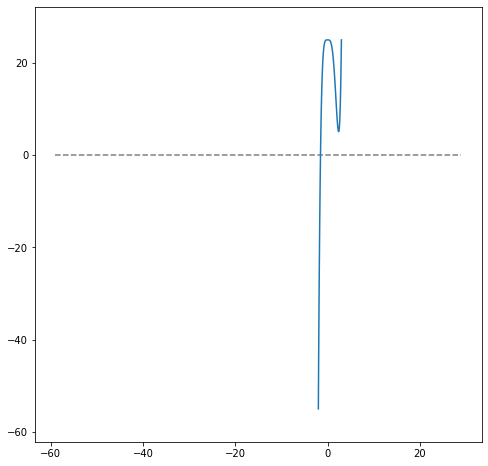

In [31]:
xn = np.linspace(-2, 3, 100)

plt.figure(figsize=(8, 8))
plt.plot(xn, g(xn))
plt.hlines(0, plt.ylim()[0], plt.ylim()[1], linestyles='--', alpha=0.5)
plt.axis('equal')
plt.show()

In [45]:
root, root_lst = secant_method(g, -3, 3, num_iter=10000)
root

the number of iteration:  3890


-1.5325002140456663

In [50]:
root, root_lst = secant_method(g, -2, 0.001)
root

the number of iteration:  40


-1.532500214045732